<div>
Olá, Gabriel!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>


Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
<s>
    
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
    
<br>
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Peço que trabalhe nesses pontos para avançarmos.
    
<br> 
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
</s>
</div>

<div>
<div class="alert alert-block alert-info">
<b>Obrigado pelos feedbacks!! Segue projeto V01.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

## Projeto Beta Bank

##### Aluno: Gabriel Veras
##### Classe: Data Science

- #### Análise exploratória dos dados

In [74]:
#Importando todas as bibliotecas necessárias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

In [75]:
data = pd.read_csv('Churn.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente.
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>

In [76]:
#Primeiras impressões sobre os dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [77]:
#Primeiras impressões sobre os dados
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [78]:
#Investigando a única coluna que possui dados ausentes. Estes valores indicam que o período de maturação para o depósito já passou,
#portanto o cliente pode resgatar seu investimento sem penalidades.
data[data['Tenure'].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [79]:
#Removendo valores NaN para conseguirmos trabalhar com os dados nos modelos preditivos em seguida.
data['Tenure'] = data['Tenure'].fillna(0)

In [80]:
#Investigando se há clientes repetidos na base de dados:
print(data[data['CustomerId'].duplicated()])

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [81]:
#Transformando as colunas RowNumber e CustomerId em strings:
data['RowNumber'] = data['RowNumber'].astype('str')
data['CustomerId'] = data['CustomerId'].astype('str')

- A EDA efetuada não encontrou problemas significativos nos dados carregados. Foram realizadas operações simples para transformar dados numéricos para categóricos apenas por conceito. Não há aparentemente valores ausentes ou duplicados que possam interferir nos próximos modelos preditivos que serão construídos.
- Ao iniciar a modelagem a seguir, foi detectado que a biblioteca sklearn não consegue trabalhar com valores ausentes. Desta forma, preenchi os valores da coluna "Tenure" com zeros (pois é exatamente o que significa).

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A análise exploratória foi executada corretamente
- As observações foram apresentadas
</div>

- #### Modelagem preditiva - dados desbalanceados

In [82]:
#Determinando Features e Targets.
#Removidas colunas que não se referem a características relevantes ao problema e trariam problemas ao trabalharmos com os modelos.
features = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
target = data['Exited']

In [83]:
#Criadas variáveis dummy para conseguirmos trabalhar com dados categóricos como dados numéricos.
features_ohe = pd.get_dummies(features, drop_first=True)
features_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(5), uint8(3)
memory usage: 654.4 KB




<div>
<div class="alert alert-block alert-info">
<b>Após Revisão 01, realizada divisão do conjunto de dados considerando também uma fração para teste (proporção 60:20:20):</b> <a class="tocSkip"></a>
</div>




In [84]:
#Dividindo o conjunto de dados em treinamento, validação e teste:
features_train, features_valid, target_train, target_valid = train_test_split(features_ohe, target, test_size=0.2, random_state=12345)
features_train, features_test, target_train, target_test = train_test_split(features_ohe, target, test_size=0.2, random_state=12345)

In [85]:
#Definindo, treinando e testando modelo de regressão logística desbalanceado:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision:', precision_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))



Recall: 0.00468384074941452
Precision: 0.2857142857142857
F1: 0.009216589861751152


In [86]:
#Definindo, treinando e testando modelo de Árvore de Decisões desbalanceado:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision:', precision_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))



Recall: 0.5128805620608899
Precision: 0.4888392857142857
F1: 0.5005714285714286


<div>
<div class="alert alert-block alert-info">
<b>Após Revisão 01, verificado que não atingimos a condição mínima de F1 para o conjunto de teste solicitada. Desta forma, testado mais um modelo de classificação:</b> <a class="tocSkip"></a>
</div>



In [87]:
#Definindo, treinando e testando modelo de Floresta Aleatória desbalanceado:
model = RandomForestClassifier()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('Recall:', recall_score(target_valid, predicted_valid))
print('Precision:', precision_score(target_valid, predicted_valid))
print('F1:', f1_score(target_valid, predicted_valid))

Recall: 0.4426229508196721
Precision: 0.7714285714285715
F1: 0.5625


In [88]:
#Checando a matriz de confusão:
confusion_matrix(target_valid, predicted_valid)

array([[1517,   56],
       [ 238,  189]])

- Após modelagem simples utilizando os dois modelos de classificação estudados no capítulo, foi possível verificar que os valores de F1 encontrados ficaram abaixo do necessário (0,59), porém o modelo de regressão logística apresentou o pior resultado entre os três. Sendo assim, ele será descartado da análise seguinte (dados balanceados + otimização de hiperparâmetros) 
- Optei por não otimizar o valor de F1 para o sistema desbalanceado pois é de se esperar que após o balanceamento das variáveis este valor aumente, portanto irei apenas otimizar o valor de F1 na próxima sessão.

- #### Modelagem preditiva - dados balanceados

In [89]:
#Definindo, treinando e testando modelo de Árvore de Decisões balanceado, com otimização do parâmetro max_depth:

for depth in range(2, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print('Recall:', recall_score(target_valid, predicted_valid))
    print('Precision:', precision_score(target_valid, predicted_valid))
    print('F1:', f1_score(target_valid, predicted_valid))


max_depth = 2 : Recall: 0.7096018735362998
Precision: 0.4365994236311239
F1: 0.5405887600356825
max_depth = 3 : Recall: 0.7096018735362998
Precision: 0.4365994236311239
F1: 0.5405887600356825
max_depth = 4 : Recall: 0.7728337236533958
Precision: 0.4824561403508772
F1: 0.594059405940594
max_depth = 5 : Recall: 0.7962529274004684
Precision: 0.46321525885558584
F1: 0.5857019810508183
max_depth = 6 : Recall: 0.7540983606557377
Precision: 0.49538461538461537
F1: 0.5979572887650882
max_depth = 7 : Recall: 0.7634660421545667
Precision: 0.4663805436337625
F1: 0.5790408525754884
max_depth = 8 : Recall: 0.711943793911007
Precision: 0.5024793388429752
F1: 0.5891472868217055
max_depth = 9 : Recall: 0.6768149882903981
Precision: 0.47068403908794787
F1: 0.5552353506243995


In [90]:
# Definindo, treinando e testando modelo de Floresta Aleatória balanceado, com otimização de hiperparâmetros conforme abaixo:
n_estimators_list = [15, 30, 50]
max_depth_list = [5, 10, 15, None]
min_samples_split_list = [2, 5, 10]

# Lista para armazenar os resultados
results = []

# Loop para testar todas as combinações
for n_est in n_estimators_list:
    for max_d in max_depth_list:
        for min_split in min_samples_split_list:

                
                # Criar o modelo com os hiperparâmetros atuais
                rf_model = RandomForestClassifier(
                    n_estimators=n_est,
                    max_depth=max_d,
                    min_samples_split=min_split,
                    class_weight='balanced',
                    random_state=12345,
                )
                
                # Treinando e realizando predições com o modelo treinado:
                rf_model.fit(features_train, target_train)
                predictions_valid = rf_model.predict(features_valid)
                
                # Calcular F1-score
                f1_valid = f1_score(target_valid, predictions_valid)
                
                # Armazenar os resultados
                results.append({
                    'n_estimators': n_est,
                    'max_depth': max_d,
                    'min_samples_split': min_split,
                    'f1_score': f1_valid
                })
                
                # Mostrar progresso
                print(f"n_est={n_est}, max_depth={max_d}, min_split={min_split}"
                      f" -> F1: {f1_valid:.4f}")


n_est=15, max_depth=5, min_split=2 -> F1: 0.6265
n_est=15, max_depth=5, min_split=5 -> F1: 0.6160
n_est=15, max_depth=5, min_split=10 -> F1: 0.6256
n_est=15, max_depth=10, min_split=2 -> F1: 0.6136
n_est=15, max_depth=10, min_split=5 -> F1: 0.6145
n_est=15, max_depth=10, min_split=10 -> F1: 0.6423
n_est=15, max_depth=15, min_split=2 -> F1: 0.5432
n_est=15, max_depth=15, min_split=5 -> F1: 0.5882
n_est=15, max_depth=15, min_split=10 -> F1: 0.5993
n_est=15, max_depth=None, min_split=2 -> F1: 0.5361
n_est=15, max_depth=None, min_split=5 -> F1: 0.5844
n_est=15, max_depth=None, min_split=10 -> F1: 0.5929
n_est=30, max_depth=5, min_split=2 -> F1: 0.6324
n_est=30, max_depth=5, min_split=5 -> F1: 0.6218
n_est=30, max_depth=5, min_split=10 -> F1: 0.6256
n_est=30, max_depth=10, min_split=2 -> F1: 0.6294
n_est=30, max_depth=10, min_split=5 -> F1: 0.6313
n_est=30, max_depth=10, min_split=10 -> F1: 0.6479
n_est=30, max_depth=15, min_split=2 -> F1: 0.5499
n_est=30, max_depth=15, min_split=5 -> F1: 0

In [91]:
#Checando a matriz de confusão:
confusion_matrix(target_valid, predicted_valid)

array([[1248,  325],
       [ 138,  289]])

- O Balanceamento foi suficiente para otimizar o modelo até o F1 esperado na atividade, porém tentaremos utilizar a técnica de superamostragem para entender se, focando nos casos onde Exited = 1 (principal interesse do modelo), a valores superiores.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- [x] O modelo baseline foi treinado corretamente
- [x] Pelo menos duas técnicas para tratamento do desbalanceamento de classes foram aplicadas.
</div>

In [92]:
#Função para superamostrar o conjunto de dados:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)


In [93]:
for depth in range(2, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print('Recall:', recall_score(target_valid, predicted_valid))
    print('Precision:', precision_score(target_valid, predicted_valid))
    print('F1:', f1_score(target_valid, predicted_valid))


max_depth = 2 : Recall: 0.7775175644028103
Precision: 0.3829296424452134
F1: 0.5131375579598145
max_depth = 3 : Recall: 0.9461358313817331
Precision: 0.29043853342918763
F1: 0.4444444444444445
max_depth = 4 : Recall: 0.9461358313817331
Precision: 0.29043853342918763
F1: 0.4444444444444445
max_depth = 5 : Recall: 0.8899297423887588
Precision: 0.35984848484848486
F1: 0.5124747134187457
max_depth = 6 : Recall: 0.8969555035128806
Precision: 0.338339222614841
F1: 0.4913406029506094
max_depth = 7 : Recall: 0.8665105386416861
Precision: 0.3422756706753006
F1: 0.4907161803713528
max_depth = 8 : Recall: 0.8407494145199064
Precision: 0.359
F1: 0.5031534688156972
max_depth = 9 : Recall: 0.8149882903981265
Precision: 0.3682539682539683
F1: 0.5072886297376094


In [94]:
# Definindo, treinando e testando modelo de Floresta Aleatória balanceado, com otimização de hiperparâmetros conforme abaixo:
n_estimators_list = [15, 30, 50]
max_depth_list = [5, 10, 15, None]
min_samples_split_list = [2, 5, 10]

# Lista para armazenar os resultados
results = []

# Loop para testar todas as combinações
for n_est in n_estimators_list:
    for max_d in max_depth_list:
        for min_split in min_samples_split_list:

                
                # Criar o modelo com os hiperparâmetros atuais
                rf_model = RandomForestClassifier(
                    n_estimators=n_est,
                    max_depth=max_d,
                    min_samples_split=min_split,
                    class_weight='balanced',
                    random_state=12345,
                )
                
                # Treinando e realizando predições com o modelo treinado:
                rf_model.fit(features_upsampled, target_upsampled)
                predictions_valid = rf_model.predict(features_valid)
                
                # Calcular F1-score
                f1_valid = f1_score(target_valid, predictions_valid)
                
                # Armazenar os resultados
                results.append({
                    'n_estimators': n_est,
                    'max_depth': max_d,
                    'min_samples_split': min_split,
                    'f1_score': f1_valid
                })
                
                # Mostrar progresso
                print(f"n_est={n_est}, max_depth={max_d}, min_split={min_split}"
                      f" -> F1: {f1_valid:.4f}")

n_est=15, max_depth=5, min_split=2 -> F1: 0.6180
n_est=15, max_depth=5, min_split=5 -> F1: 0.6180
n_est=15, max_depth=5, min_split=10 -> F1: 0.6180
n_est=15, max_depth=10, min_split=2 -> F1: 0.6276
n_est=15, max_depth=10, min_split=5 -> F1: 0.6336
n_est=15, max_depth=10, min_split=10 -> F1: 0.6191
n_est=15, max_depth=15, min_split=2 -> F1: 0.5981
n_est=15, max_depth=15, min_split=5 -> F1: 0.5767
n_est=15, max_depth=15, min_split=10 -> F1: 0.6118
n_est=15, max_depth=None, min_split=2 -> F1: 0.6052
n_est=15, max_depth=None, min_split=5 -> F1: 0.5872
n_est=15, max_depth=None, min_split=10 -> F1: 0.5976
n_est=30, max_depth=5, min_split=2 -> F1: 0.6151
n_est=30, max_depth=5, min_split=5 -> F1: 0.6151
n_est=30, max_depth=5, min_split=10 -> F1: 0.6174
n_est=30, max_depth=10, min_split=2 -> F1: 0.6308
n_est=30, max_depth=10, min_split=5 -> F1: 0.6237
n_est=30, max_depth=10, min_split=10 -> F1: 0.6277
n_est=30, max_depth=15, min_split=2 -> F1: 0.5917
n_est=30, max_depth=15, min_split=5 -> F1: 0

In [95]:
#Checando a matriz de confusão:
confusion_matrix(target_valid, predicted_valid)

array([[976, 597],
       [ 79, 348]])

- A superamostragem não resultou numa melhora no valor de F1. Para finalizar as tentativas de otimização do modelo, tentaremos ajustar o limiar para conseguir valores de precisão mais altos com o melhor modelo encontrado: Floresta Aleatória.

In [101]:
#Calculando limiar para otmimzação do valor de F1:
model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, class_weight='balanced')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.91, 0.05):
    predicted_valid = probabilities_one_valid > threshold# < escreva o código aqui >
    precision = precision_score(target_valid, predicted_valid)# < escreva o código aqui >
    recall = recall_score(target_valid, predicted_valid)# < escreva o código aqui >
    f1 = f1_score(target_valid, predicted_valid)
    print(
        'Limiar = {:.2f} | Precisão = {:.3f}, Sensibilidade = {:.3f}, F1 = {:.3f}'.format(
            threshold, precision, recall, f1))


Limiar = 0.00 | Precisão = 0.213, Sensibilidade = 1.000, F1 = 0.352
Limiar = 0.05 | Precisão = 0.222, Sensibilidade = 0.998, F1 = 0.363
Limiar = 0.10 | Precisão = 0.251, Sensibilidade = 0.993, F1 = 0.401
Limiar = 0.15 | Precisão = 0.279, Sensibilidade = 0.960, F1 = 0.433
Limiar = 0.20 | Precisão = 0.317, Sensibilidade = 0.948, F1 = 0.475
Limiar = 0.25 | Precisão = 0.356, Sensibilidade = 0.913, F1 = 0.513
Limiar = 0.30 | Precisão = 0.406, Sensibilidade = 0.867, F1 = 0.553
Limiar = 0.35 | Precisão = 0.461, Sensibilidade = 0.834, F1 = 0.593
Limiar = 0.40 | Precisão = 0.522, Sensibilidade = 0.778, F1 = 0.625
Limiar = 0.45 | Precisão = 0.564, Sensibilidade = 0.721, F1 = 0.633
Limiar = 0.50 | Precisão = 0.597, Sensibilidade = 0.658, F1 = 0.626
Limiar = 0.55 | Precisão = 0.662, Sensibilidade = 0.614, F1 = 0.637
Limiar = 0.60 | Precisão = 0.736, Sensibilidade = 0.548, F1 = 0.628
Limiar = 0.65 | Precisão = 0.767, Sensibilidade = 0.471, F1 = 0.583
Limiar = 0.70 | Precisão = 0.797, Sensibilidade 

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Aqui você precisa calcular o resultado final de `F1` no conjunto de **teste**. O conjunto de validação é utilizado para fazer estudo de hiperparâmetros e/ou threshold (como feito acima), mas a avaliação final do melhor modelo sempre deve ser feita no conjunto de teste, ou seja, o conjunto de dados que não foi utilizado em nenhuma etapa de construção do modelo em questão.</s>
</div>

<div>
<div class="alert alert-block alert-info">
<b>Treinamento e avaliação de F1 para o conjunto de teste:</b> <a class="tocSkip"></a>
</div>



In [102]:
# Treinar o modelo final com os melhores parâmetros encontrados (hiperparâmetros e limiar)
final_model = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, class_weight='balanced')
final_model.fit(features_train, target_train)

# AGORA usar o conjunto de TESTE para avaliação final
probabilities_test = final_model.predict_proba(features_test)[:, 1]
predictions_test = (probabilities_test >= 0.45).astype(int)

# Calcular F1 final no conjunto de teste
final_f1 = f1_score(target_test, predictions_test)
print(f"F1-score final no conjunto de teste: {final_f1:.4f}")

F1-score final no conjunto de teste: 0.6424


In [105]:
#Calculando métrica AUC-ROC:
auc_roc = roc_auc_score(target_valid, probabilities_test)
print(auc_roc)

0.8599582235945872


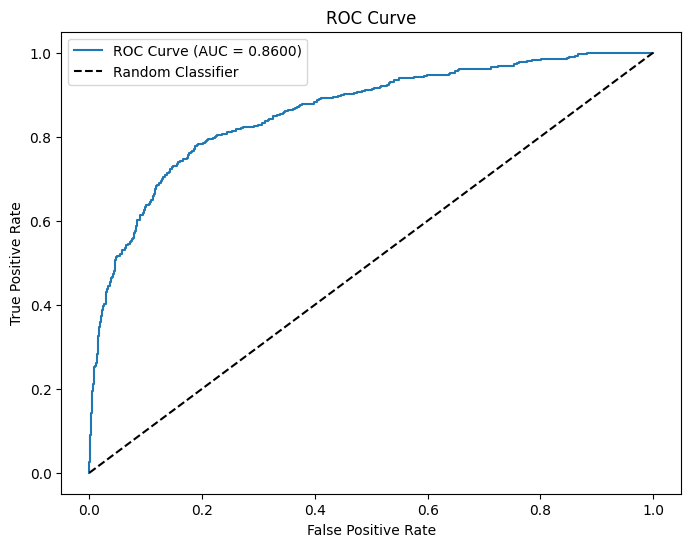

In [106]:
#Plotando curva ROC:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Conclusões

- Foi possível identificar que o modelo que melhor descreve o evento de saída de clientes do banco Beta Bank é o modelo de Floresta Aleatória, com hiperparâmetros e limiar devidamente otimizados.

- O valor de AUC-ROC para nossa curva ficou em 0,86; o que pode ser considerado positivo, indicando que o modelo está bem balanceado dentre as possibilidade de limiar disponíveis. O valor de F1 encontrado indica que o modelo se comporta melhor que um classificador aleatório, entretanto pode estar subestimado se comparado com o AUC-ROC.